In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [85]:
iris = pd.read_csv("Iris (1).csv")

In [86]:
iris.sample(5)

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
128,129,6.4,2.8,5.6,2.1,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
120,121,6.9,3.2,5.7,2.3,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
111,112,6.4,2.7,5.3,1.9,Iris-virginica


<AxesSubplot:xlabel='Sepal_Length', ylabel='Sepal_Width'>

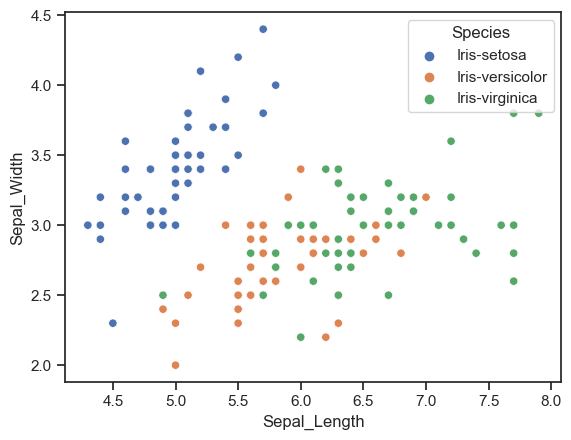

In [87]:
sns.scatterplot(data=iris, x ='Sepal_Length', y = 'Sepal_Width', hue = 'Species')

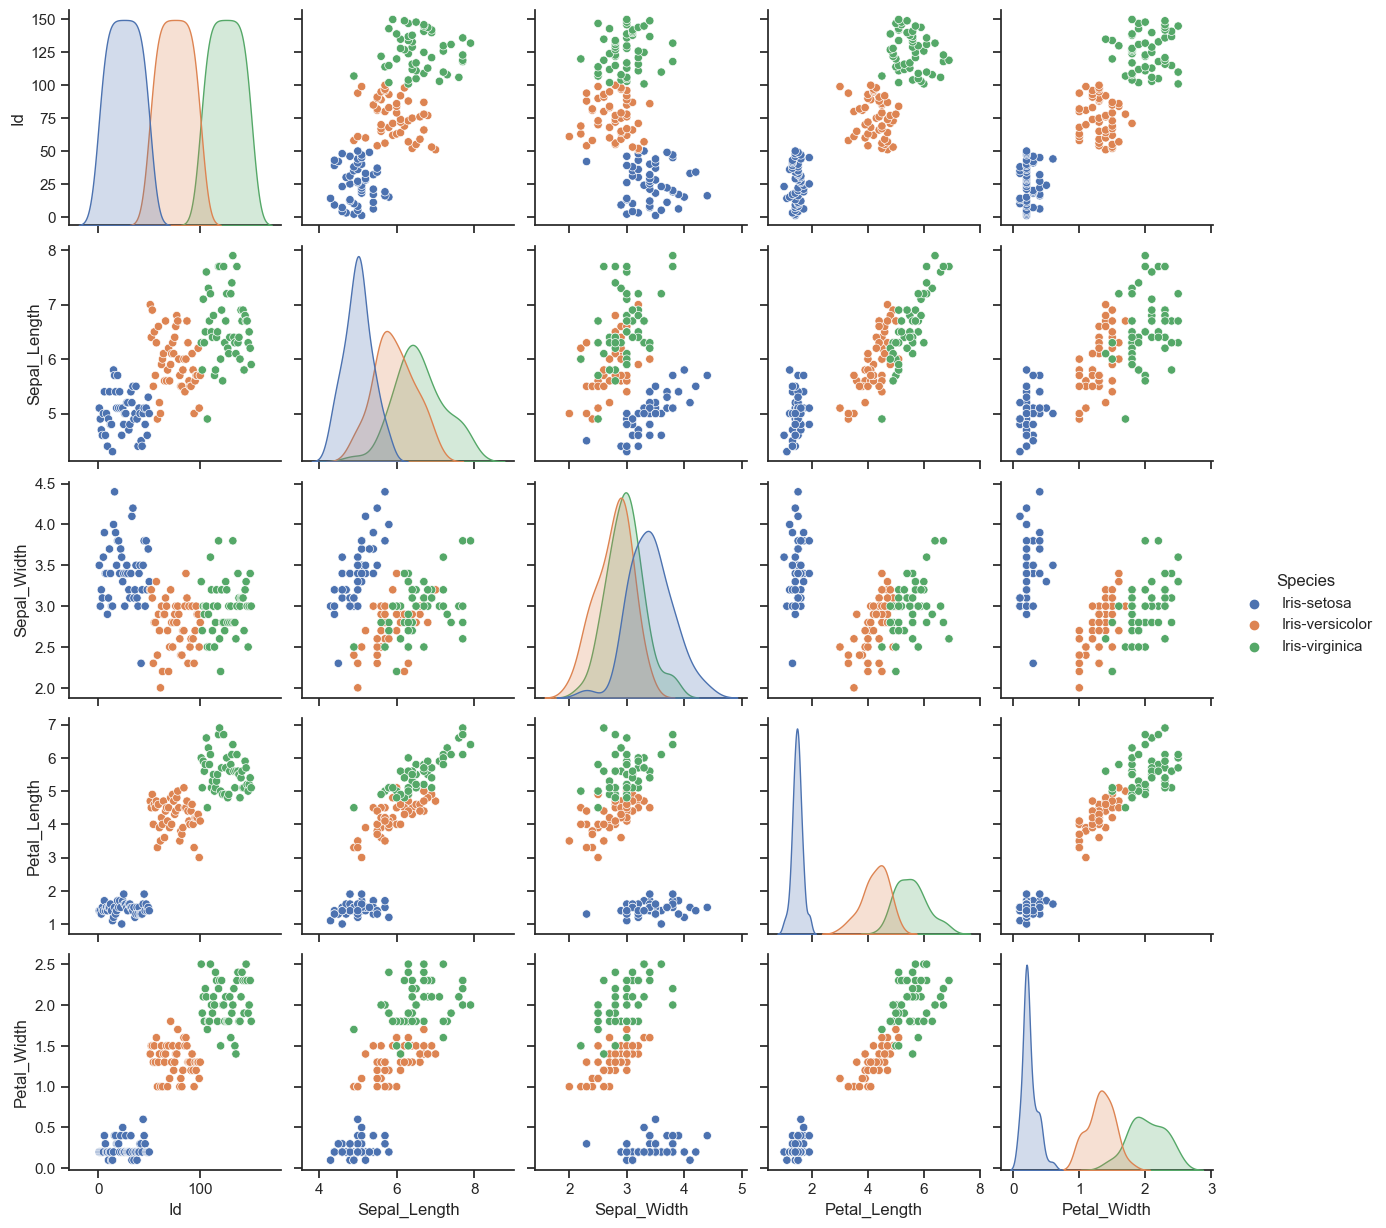

In [88]:
sns.set(style="ticks")
sns.pairplot(iris, hue="Species")

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.model_selection import train_test_split

In [98]:
# we will split data to 80% training data and 20% testing data with random seed of 10
X = iris.drop(['Species'], axis=1)
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [99]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)

X_train.shape: (120, 5)
X_test.shape: (30, 5)
Y_train.shape: (120, 5)
Y_test.shape: (30,)


In [93]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=10,)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Model Accuracy:
LR: accuracy=0.933333 std=(0.081650)
LDA: accuracy=1.000000 std=(0.000000)


CART: accuracy=0.991667 std=(0.025000)
KNN: accuracy=1.000000 std=(0.000000)
GNB: accuracy=1.000000 std=(0.000000)
SVC: accuracy=1.000000 std=(0.000000)


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [95]:
# models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [100]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('CART', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('GNB', GaussianNB()),
 ('SVC', SVC(gamma='auto'))]

In [96]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [97]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)
    

----------------
Testing LR
Accuracy: 0.9333333333333333
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

----------------
Testing LDA
Accuracy: 1.0
Confusion Matrix:
[[ 7  0  0]
 [ 0 12  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        3